<a href="https://colab.research.google.com/github/ndcoles1420/ECEN314/blob/main/PythonSoundProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Import all necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig

In [41]:
#Create a function for the multi-echo filter
def multi_echo(x, sr, alpha, r, n):
  t = np.arange(len(x)) / sr
  y = []

  for i in range(len(x)):
    ypoint = 0
    for k in range(n):
      index = i - k*r
      if(index >= 0):
        ypoint = ypoint + (alpha**k)*(x[index])
    
    y.append(ypoint)
  
  return y

  

In [42]:
#Create a function for the feedback comb filter
def feedback_comb(x, sr, alpha, r):
  t = np.arange(len(x)) / sr
  y = [x[0]]
  ypoint = 0
  

  for i in range(1, len(x)):
    if(i-r >= 0):
      ypoint = alpha*y[i-r] + x[i]
    
    y.append(ypoint)
  
  return y
    


In [46]:
#Get the dry signal
x, sr = sf.read("/content/drive/MyDrive/Colab Notebooks/discrete_systems_time_domain_dry_source.wav")

#Get time values
t = np.arange(len(x)) / sr

#Set parameters for multi filter
alpham = 0.5
rm = 5
n = 5

#Set parameters for feedback filter
alphaf = 0.5
rf = 5

#Call functions
ym = multi_echo(x, sr, alpham, rm, n)
yf = feedback_comb(x, sr, alphaf, rf)


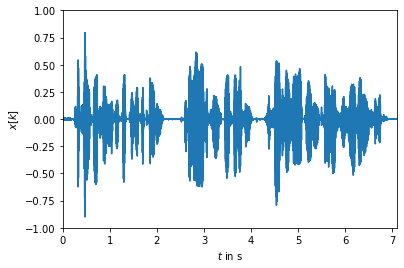

In [47]:
#Plot original dry_source.wav
plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1]);

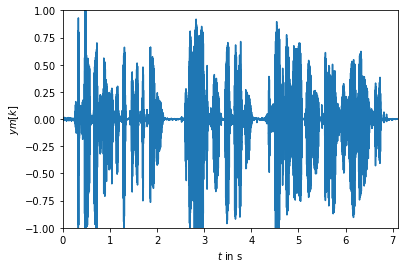

In [48]:
#Plot wet signal using multi_echo
plt.plot(t, ym)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$ym[k]$')
plt.axis([0, t[-1], -1, 1]);

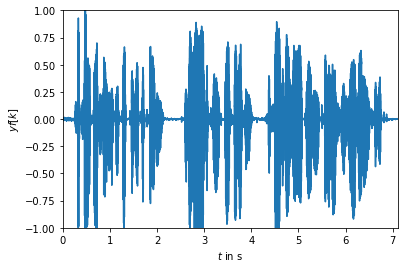

In [49]:
#Plot wet signal using feedback_comb
plt.plot(t, yf)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$yf[k]$')
plt.axis([0, t[-1], -1, 1]);